# 2. Rendimiento diario y su distribucion

**Objetivo**: Descarga los precios de cierre ajustado diarios para los tres activos, tomando en cuenta como período del 2018-01-01 hasta día en el que se deja esta actividad. Calcula el rendimiento diario para los tres activos. Gráfica la distribución de los rendimientos diarios para los tres activos en gráficas separadas. (20%)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

In [9]:
sns.set_theme(
    style="darkgrid"
)

In [ ]:
def standar_hist(data : pd.Series, title: str, xlabel : str) -> None:
    fig, ax = plt.subplots(figsize=(6,6))
    
    sns.histplot(
        data=data,
        ax=ax,
        bins=70,
        shrink=0.80
    )
    
    ax.set(title = title, xlabel = xlabel)
    
    ax.grid(True, axis="y", linestyle=":", alpha=0.4)
    
    plt.show()

Tomaré como fecha de inicio el 2018-01-01 hasta el día en que se entrega esta actividad.

In [3]:
tikets = ["PRGO", "PLTR", "BRK-B"]

df = yf.download(tikets, start="2018-01-01", end="2025-02-02")["Close"]
df.head()

/home/rigodev/ITESO/06/portafolios/env/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  3 of 3 completed


Ticker,BRK-B,PLTR,PRGO
Date,,,
2018-01-02,197.220001,NaN,73.287315
2018-01-03,199.789993,NaN,73.083046
2018-01-04,200.690002,NaN,74.423126
2018-01-05,201.419998,NaN,74.504822
2018-01-08,202.740005,NaN,73.646835


Sin embargo, algunos activos tienen valores NaN en sus registros, así que eliminaré las fechas en las que el dato sea NaN.

In [4]:
df = df.dropna()
df.head()

Ticker,BRK-B,PLTR,PRGO
Date,,,
2020-09-30,212.940002,9.50,39.038525
2020-10-01,212.020004,9.46,38.502827
2020-10-02,211.179993,9.20,38.137188
2020-10-05,212.360001,9.03,38.519833
2020-10-06,210.259995,9.90,37.754536


In [5]:
daily_returns = df.pct_change().dropna()
daily_returns.head()

Ticker,BRK-B,PLTR,PRGO
Date,,,
2020-10-01,-0.004320,-0.004211,-0.013722
2020-10-02,-0.003962,-0.027484,-0.009496
2020-10-05,0.005588,-0.018478,0.010033
2020-10-06,-0.009889,0.096346,-0.019868
2020-10-07,0.014411,0.010101,0.016216


### Gráficas de los activos

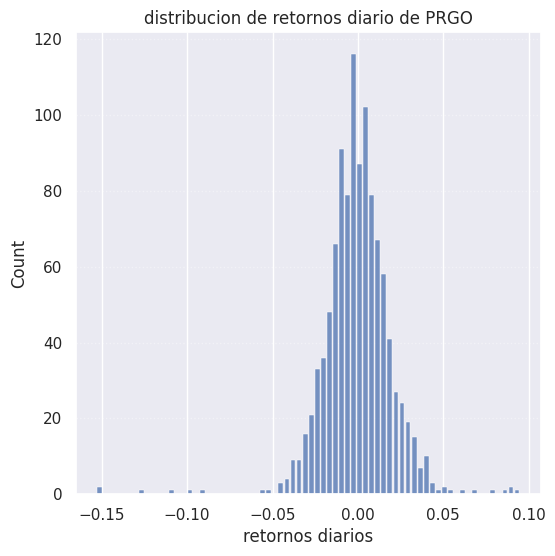

In [ ]:
standar_hist(daily_returns["PRGO"], "Daily returns distribution for PRGO", "Daily returns")

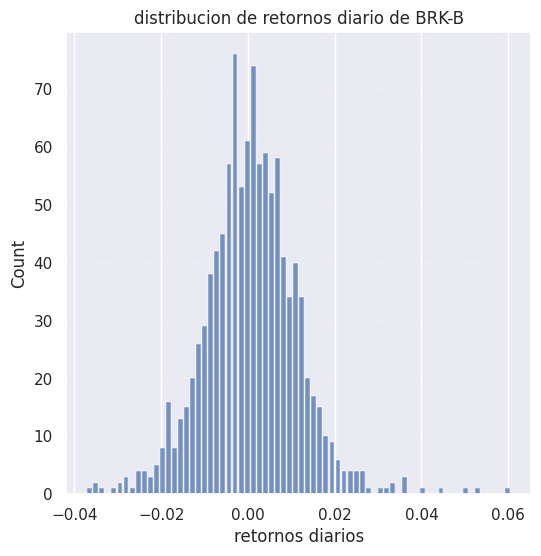

In [13]:
standar_hist(daily_returns["BRK-B"], "Daily returns distribution for BRK-B", "Daily returns")

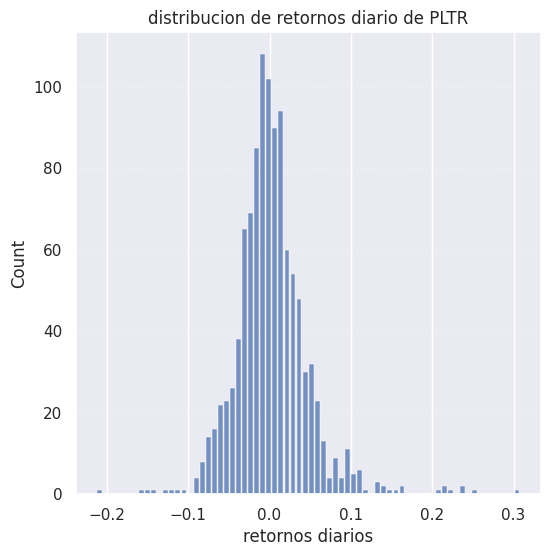

In [14]:
standar_hist(daily_returns["PLTR"], "Daily returns distribution for PLTR", "Daily returns")

# 3. Rendimiento anual

**Objetivo**: Calcula el rendimiento promedio anual para los tres activos e interprétalos

In [16]:
daily_returns.mean()*252

Ticker
BRK-B    0.197245
PLTR     0.748404
PRGO    -0.061178
dtype: float64

Cada uno de los activos tiene diferentes niveles de rentabilidad que los puede volver atractivos para los diferentes tipos de inversores. Sin embargo, si hablamos de portfolios long only el ganador indiscutible, solo evaluando la metrica de rendimiento es PLTR dado que su rendimiento anual promedio desde 2020-09-30 que es su primera fecha de cotización y desde donde se podría encontrar datos es del 74.84%, lo que lo vuelve un activo para portafolios que mantiene los activos en sus carteras durante una ventana de tiempo aceptable.

Por otro lado, tenemos a PRGO, quien en promedio en poco más de 5 años ha generado una perdida de -0.06% en rendimiento como cambio en el precio para sus accionistas, sin embargo aquí hay un punto importante, pues PRGO es una empresa en un sector muy consolidado, la cual paga dividendos a sus accionistas. En su ultimo pago de dividendos esta pago un 8.16%.

Por ultimo tenemos a BRK-B el cual es un fondo de inversión administrado por Berkshire Hathaway Inc, el cual ha tenido en los ultimos años un rendimiento promedio de 19.72% el viene superando por lo menos al benchmark del SP500, teniendo este un rendimiento en la misma ventana de tiempo promedio de 15.1432%

# 4. Medidas de riesgo

**Objetivo**: Calcula el riesgo (varianza y volatilidad) anual para los tres activos. Tomando en cuenta el rendimiento y el riesgo de cada activo (utiliza alguna métrica como el Coeficiente de Variación), interpreta, compara y responde ¿Qué activo es mejor? ¿Por qué?

In [20]:
# Varianza de los activos
daily_returns.var()*252

Ticker
BRK-B    0.029363
PLTR     0.510484
PRGO     0.099496
dtype: float64

In [21]:
daily_returns.std() * np.sqrt(252)

Ticker
BRK-B    0.171355
PLTR     0.714481
PRGO     0.315430
dtype: float64

Metrica que incorpora el rendimiento del activo en el calculo del riesgo

In [22]:
(daily_returns.std() * np.sqrt(252)) / (daily_returns.mean()*252)

Ticker
BRK-B    0.868744
PLTR     0.954673
PRGO    -5.155904
dtype: float64

Con la información adicional que nos proporcionan las metricas de riesgo, es como podemos evaluar mejor la inversión en cada uno de los activos. En primer lugar tenemos a BRK-B, el cual si agregamos la pieza de información de la volatilidad, se posicionaria como el **mejor activo** de la selección, en un portfolio long only, **por que** cuenta con el ratio unidad de rendimiento por unidada de riesgo **menor a uno** y además, es la mejor posicionada de los 3 activos.

En el otro extremo tenemos a PRGO quien directamente en lugar de ofrecer una unidad de rendimiento por cada unidad de riesgo que tomamos directamente ofrece poco más de 5 unidades de riesgo por una de perdidad, caracteristica que no nos interesa en portafolios long only, incluso si en lugar de ser una unidad perdida fuera una unidad de rendimiento este activo es demasiado riesgoso para el poco rendimiento que ofrese.

Por utlimo, nuestro punto medio, el cual corresponde a PLTR quien aunque ofrece un rendimiento muy atractivo para el inversionista casi esta pagando una ratio o aforo 1:1, donde por cada 0.95 unidades de riesgo que tomes se te pagare una unidad de rendimiento.  

# 5. Asimetria

**Objetivo**: Calcula la asimetría (numéricamente), interprétala y complementa los comentarios realizados en el punto anterior. ¿Tus conclusiones acerca del mejor activo cambiaron? ¿Por qué? 

In [23]:
daily_returns.skew()

Ticker
BRK-B    0.325542
PLTR     1.118934
PRGO    -0.904862
dtype: float64

Con el cálculo de la asimetría podemos observar que PLTR presenta la mejor métrica en términos del perfil de portafolio que hemos venido declarando. En este sentido, su asimetría es muy positiva (superior a 1), lo que indica una distribución con cola hacia la derecha: la mayor parte de los rendimientos se concentra alrededor de valores relativamente bajos/moderados, pero existen episodios de rendimientos positivos grandes que “estiran” la distribución. En la ventana seleccionada, esto sugiere un comportamiento más alineado con una estrategia que busca potencial de upside, ya que hay mayor presencia de resultados extremos positivos.

Por el otro extremo, nuevamente tenemos a PRGO, que exhibe la asimetría menos favorable. Una asimetría baja o negativa implica una distribución con cola hacia la izquierda, es decir, mayor probabilidad de observar rendimientos negativos extremos (eventos de caída) en comparación con positivos extremos. En términos de construcción de portafolio, esto se interpreta como un activo con mayor riesgo de downside y menor “beneficio” de escenarios de sorpresa positiva, por lo que resulta menos conveniente para el perfil que estamos buscando (al menos bajo la ventana de tiempo analizada).

En un punto medio, tenemos a BRK-B quien muestra una ligera asimetria positiva, lo que sugiere una distribucion casi simetrica, pero con una cola moderamente pesada hacia la derecha. En general es un activo bien equilibrado en terminos de las metricas antes evaluadas.

Sin embargo, dados los resultados de la asimetría y el tipo de portafolios que en lo personal son más atractivos para mi, considero que PLTR es una mejor opción de inversión, tras ver el nivel de su asimetria.
